# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Exploratory Data Analysis (EDA)

In [211]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
cb_df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
cb_df.head()
y = cb_df['call']
X = cb_df.copy().drop(['call','id','firstname','ad'],axis=1)
dc = {'c':0,'b':1}
dk = {'a':0,'s':1}
ds = {'f':1,'m':0}
dr = {'w':1,'b':0}
do = {'': np.nan, 'Nonprofit':1,'Private':1.5,'Public':0.5}
dsc = {'': np.nan, 'somcol':1,'colp':1.5,'hsg':0.5}
dexp = {'5':5, 'some':9, '':np.nan, '3':3, '2':2, '1':1, '8':8, '7':7, '0.5':0.5, '10':10, '0':0, '4':4, '6':6} 
X.city = X.city.astype(str).apply(lambda x: dc[x])
X.kind = X.kind.astype(str).apply(lambda x: dk[x])
X.sex = X.sex.astype(str).apply(lambda x: ds[x])
X.race = X.race.astype(str).apply(lambda x: dr[x])
X.ownership = X.ownership.astype(str).apply(lambda x: do[x])
X.schoolreq = X.schoolreq.astype(str).apply(lambda x: dsc[x])
X.expminreq = X.expminreq.astype(str).apply(lambda x: dexp[x])
X.fillna(X.mean(),inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 61 columns):
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
sex                   4870 non-null int64
race                  4870 non-null int64
h                     4870 non-null float32
l                     4870 non-null float32
city                  4870 non-null int64
kind                  4870 non-null int64
adid                  4870 non-null float32
fracblack             4870 non-null float32
fracwhite      

In [213]:
cb_pv = cb_df.pivot_table('id', ['call'], 'race', aggfunc='count')
cb_pv.index = ['Failure', 'Success']
cb_pv.columns = ['Black', 'White']
cb_pv.loc['Total'] = [cb_pv['Black'].sum(), cb_pv['White'].sum()]
cb_pv

,Black,White
Failure,2278,2200
Success,157,235
Total,2435,2435


In [214]:
w_s = cb_pv.loc['Success','White']/cb_pv.loc['Total','White']
print('Call back rate for White:',w_s)
b_s = cb_pv.loc['Success','Black']/cb_pv.loc['Total','Black']
print('Call back rate for Black:',b_s)

Call back rate for White: 0.0965092402464
Call back rate for Black: 0.064476386037


The above numbers are not small. However, until we have evidence, we can not assume that there is something going on here.

### 1. What test is appropriate here? Does CLT apply?
Answer: Since the sample size is 2435 from each of two samples, which is larger than 30, a two sample z-test is appropriate here.
For the CLT to apply,
a) Size: Number of samples should be at least 10% of population, which is definitely true, as we have more than 24350 white and black people on earth
b) Independence: The resumes are randomly picked and hence independent. 
**CLT can be applied.**

### 2. What are the null and alternate hypotheses?
H0: The call back rates are independent of the race of the resumes

HA: The call back rates are depending on which race the resume is tagged with.

Let us fix the statistic significance level alpha at a strict value of 0.01

### 3. Compute Margin of error, confidence interval and p-value


In [215]:
margin_of_error = (w_s - b_s)/2
print("a) Margin of error: ",margin_of_error)

a) Margin of error:  0.0160164271047


In [216]:
conf_int = 2*margin_of_error
print("b) Confidence interval: ", (w_s - b_s))

b) Confidence interval:  0.0320328542094


In [217]:
# Calculating mean and standard deviation using info from (only) pivot table from first principles, for fun
wm = cb_pv.iloc[1,1]/cb_pv.iloc[2,1]
bm = cb_pv.iloc[1,0]/cb_pv.iloc[2,0]
wstd = np.sqrt((cb_pv.iloc[1,1]*(1-wm)**2 + cb_pv.iloc[0,1]*wm**2)/cb_pv.iloc[2,1])
bstd = np.sqrt((cb_pv.iloc[1,0]*(1-bm)**2 + cb_pv.iloc[0,0]*bm**2)/cb_pv.iloc[2,0])

In [218]:
# Two sample z test
def two_samp_z(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - stats.norm.cdf(np.abs(z)))
    return z,pval

In [219]:
zsc,pval = two_samp_z(wm,bm,0,wstd,bstd,cb_pv.iloc[2,1],cb_pv.iloc[2,0])
print("Z score:",zsc)
print("p-value:",pval)

Z score: 4.11555043573
p-value: 3.86256520752e-05


Since the p value is almost 0, which is less than 0.01, **We reject null hypothesis in favor of alternative hypothesis, that there is discrimination**

The z-value 4.1156 corresponds to a confidence level > 99.998%.

What is the interpretation? Or the "Story" as asked in the exercise question:

99.998% of the random samples of size 2435 (each of black and white) applicants will have the mean difference in call back rate of at least 0.032

In [220]:
# Another interesting factor to examine could be to examine if there's gender bias.
cb_pv2 = cb_df.pivot_table('id', ['call'], 'sex', aggfunc='count')
cb_pv2.index = ['Failure', 'Success']
cb_pv2.columns = ['Female', 'Male']
cb_pv2.loc['Total'] = [cb_pv2['Female'].sum(), cb_pv2['Male'].sum()]
cb_pv2.loc['Success rate'] = [float(cb_pv2.loc['Success','Female'])/cb_pv2.loc['Total','Female'], float(cb_pv2.loc['Success','Male'])/cb_pv2.loc['Total','Male'].sum()]
cb_pv2

,Female,Male
Failure,3437.000000,1041.000000
Success,309.000000,83.000000
Total,3746.000000,1124.000000
Success rate,0.082488,0.073843


Interesting! Firstly, there is about 3 times female applicants compared to male, and there is slight bias towards female gender. We can run a z test to see if there is a real bias.

H0: There is no gender bias

HA: There is no gender bias

alpha = 0.01

In [221]:
fem_mean = cb_pv2['Female']['Success rate']
male_mean = cb_pv2['Male']['Success rate']

fem_std = np.sqrt(fem_mean - fem_mean **2)
male_std = np.sqrt(male_mean-male_mean**2)

zsc_g,pval_g = two_samp_z(fem_mean, male_mean, 0, fem_std, male_std, cb_pv2['Female']['Total'],cb_pv2['Male']['Total'])

print("The Z score and pvalue are:",zsc_g,pval_g)

The Z score and pvalue are: 0.960214067753 0.336947488127


**A large pvalue is indicating that there is no gender preference.**

In [222]:
# There are huge number of features, hence it is not a good idea to examine one by one.
# Let us try fitting a logistic regression model and then examine the coefficients.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

X_sc = scale(X)

c_space = np.logspace(-4, 6, 12)
param_grid = {'C': c_space }

# Instantiate a lasso regressor: lasso
lr = LogisticRegression()

lr_cv = GridSearchCV(lr,param_grid,cv=5)

# Fit the regressor to the data['call']
lr_cv.fit(X_sc,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   8.11131e-04,   6.57933e-03,   5.33670e-02,
         4.32876e-01,   3.51119e+00,   2.84804e+01,   2.31013e+02,
         1.87382e+03,   1.51991e+04,   1.23285e+05,   1.00000e+06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [223]:
# Compute and print the coefficients
def form_series_print5(lr_cv_coef,X):
    lv_series = pd.Series(list(lr_cv_coef[0]),index=X.columns)
    lv_series.sort_values(ascending=False,inplace=True)
    print(lv_series.head(5))
lr_cv_coef = lr_cv.best_estimator_.coef_
print("Top 5 influencers with regularized logreg with cv and scaled features")
form_series_print5(lr_cv_coef,X)
print("Best params and best score respectively: ",lr_cv.best_params_,lr_cv.best_score_)

Top 5 influencers with regularized logreg with cv and scaled features
specialskills    0.141283
adid             0.135857
city             0.122698
race             0.105400
yearsexp         0.093378
dtype: float64
Best params and best score respectively:  {'C': 0.006579332246575682} 0.918891170431


**From the above result, conclusion is that "Special Skills" is the most determining factor for callback.**

In [224]:
# Just out of curiosity, checking what a plain venilla logistic model gives with unscaled features
lr_plain = LogisticRegression()
lr_plain.fit(X,y)
print("Top 5 influencers with plain logreg and unscaled features")
form_series_print5(lr_plain.coef_,X)
# Plain venilla with scaled features
lr_plain_sc = LogisticRegression()
lr_plain_sc.fit(X_sc,y)
print("Top 5 influencers with plain logreg and scaled features")
form_series_print5(lr_plain_sc.coef_,X)

Top 5 influencers with plain logreg and unscaled features
city             0.656955
specialskills    0.537070
col              0.475738
transcom         0.444606
race             0.432148
dtype: float64
Top 5 influencers with plain logreg and scaled features
adid             0.368856
city             0.356005
col              0.337366
specialskills    0.260998
race             0.221911
dtype: float64


** Checking if Race and special skills are correlated**

(0.0030598131994727953, 0.83095576251878744)

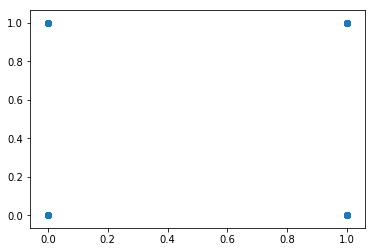

In [225]:
plt.scatter(X.race,X.specialskills)
stats.pearsonr(X.race,X.specialskills)

Wow! The race and special skills are uncorrelated. So we can not say that perhaps blacks were less privileged to be trained and hence didnt have special skills to be called back!

This is an example of how we can check for correlation between two features. 

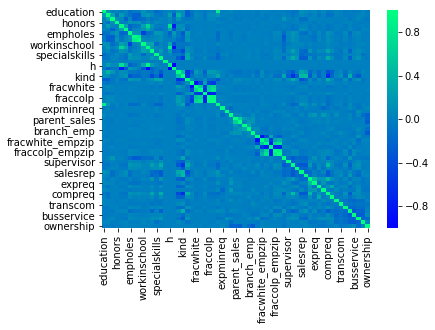

In [226]:
import seaborn
seaborn.heatmap(X.corr(),cmap='winter')

Comment: From the heatmap above, there are more uncorrelated features than correlated ones. It is hard to make out anything. Instead we can focus on top 5, below:

               specialskills          adid      city          race  yearsexp
specialskills       1.000000  3.144809e-01 -0.045799  3.059813e-03 -0.025002
adid                0.314481  1.000000e+00 -0.605422  3.603902e-19 -0.068922
city               -0.045799 -6.054217e-01  1.000000  0.000000e+00  0.186549
race                0.003060  3.603902e-19  0.000000  1.000000e+00  0.002646
yearsexp           -0.025002 -6.892184e-02  0.186549  2.646070e-03  1.000000


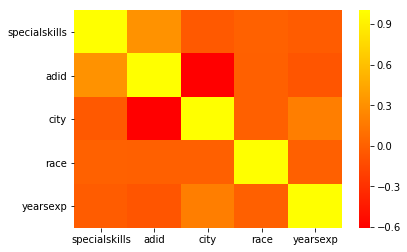

In [227]:
seaborn.heatmap(X[lv_series.index[0:5]].corr(),cmap='autumn')
print(X[lv_series.index[0:5]].corr())

Comment: Race is very weakly correlated with other 4 factors in the top 5 list. Hence it is definitely an independent influencer, although it is not the number 1 influencer. Surely the 3 of the 5 top features are neutral. Not sure what adid means. Race is a determining factor as per this analysis, which is not a good thing.

**Conclusions:**
1. The CLT applies to the given dataset, and hence all the statistics tests can be carried out.
2. In this case, statistic significance also means practical significance, since the question is of race discrimination.
3. The race is one of the top 5 factors that influence the call back, and it is not correlated with the other 4. This further strengthens the argument that there is discrimination.